### Loading and making predictions base on a trained model


In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC  
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Get the curent date/time
today = pd.to_datetime('today')

In [3]:
# # Load the model
# from tensorflow.keras.models import load_model
# model = load_model("On_Ventilator_ANN_"+today.strftime("%Y-%m-%d")+".h5")

In [4]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("On_Ventilator_ANN_2020-12-09.h5")

### Creating data for future predictions.
### We need future data for our model features (X values) so we can make a predictions on the ventilators needed. We will give our self a modest task to predict the nuber of ventilators needed in the next two weeks, meaning we need a predicted values for the hospitalisation, positive and recovered cases.
### There are a many scientific teams tasked with forcasting, and CDC  collects data, from over 40 modeling groups that they included in the ensembled forecasts. The data can be found on the CDC forcasting site, https://www.cdc.gov/coronavirus/2019-ncov/covid-data/forecasting-us.html

In [17]:
Prediction_data = pd.read_csv('National_Covid_Data_2020-12-10_Prediction.csv')
# Prediction_data_cleaned = Prediction_data(['Active','Active Hospitalized',\
#        'deathIncrease','onVentilatorCumulative','states'])
Prediction_data.tail(20)



,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
319,12/6/2020,273398.0,1146.0,31946.0,20145.0,2311,101501.0,585872.0,161992345.0,1175503.0,3322.0,7095.0,14536872,177801,5624609.0,56.0,204147004.0,1665874.0
320,12/7/2020,274745.0,1347.0,32120.0,20098.0,3614,102148.0,589486.0,163378726.0,1386381.0,3328.0,7073.0,14717065,180193,5714557.0,56.0,205934174.0,1787170.0
321,12/8/2020,277400.0,2655.0,32406.0,20483.0,4309,104590.0,593795.0,164571546.0,1192820.0,3359.0,7245.0,14931818,214753,5788509.0,56.0,207581765.0,1647591.0
322,12/9/2020,280454.0,3054.0,32720.0,20922.0,5326,106688.0,599121.0,165833373.0,1261827.0,3368.0,7624.0,15142845,211027,5889896.0,56.0,209372157.0,1790392.0
323,12/10/2020,NaN,NaN,NaN,NaN,5462,109412.0,NaN,NaN,NaN,NaN,0.0,15349628,206783,5970480.0,NaN,NaN,NaN
324,12/11/2020,NaN,NaN,NaN,NaN,5578,111728.0,NaN,NaN,NaN,NaN,0.0,15576982,227354,6147116.0,NaN,NaN,NaN
325,12/12/2020,NaN,NaN,NaN,NaN,5610,112377.0,NaN,NaN,NaN,NaN,0.0,15733399,156417,6192058.0,NaN,NaN,NaN
326,12/13/2020,NaN,NaN,NaN,NaN,5572,111615.0,NaN,NaN,NaN,NaN,0.0,15973253,239854,6288834.0,NaN,NaN,NaN
327,12/14/2020,NaN,NaN,NaN,NaN,5684,113864.0,NaN,NaN,NaN,NaN,0.0,16164569,191316,6386712.0,NaN,NaN,NaN
328,12/15/2020,NaN,NaN,NaN,NaN,5783,115843.0,NaN,NaN,NaN,NaN,0.0,16332015,167445,6438448.0,NaN,NaN,NaN


In [24]:
df_Covid_data_Offset_prediction = Prediction_data.set_index("date")
df_Covid_data_Offset_prediction = df_Covid_data_Offset_prediction[['hospitalizedIncrease','hospitalizedCurrently','positive',\
             'positiveIncrease','recovered','onVentilatorCurrently']]
df_Covid_data_Offset_prediction

,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,onVentilatorCurrently
date,,,,,,
1/22/2020,0,NaN,0,0,NaN,NaN
1/23/2020,0,NaN,0,0,NaN,NaN
1/24/2020,0,NaN,0,0,NaN,NaN
1/25/2020,0,NaN,0,0,NaN,NaN
1/26/2020,0,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...
12/21/2020,6400,128201.0,17778197,263570,7088000.0,0.0
12/22/2020,6511,130429.0,17998336,220138,7149595.0,0.0
12/23/2020,6706,134330.0,18221436,223100,7263930.0,0.0


In [27]:
df_Covid_data_Offset_prediction = df_Covid_data_Offset_prediction.dropna()
df_Covid_data_Offset_prediction

,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,onVentilatorCurrently
date,,,,,,
3/25/2020,1949,5140.0,75242,12891,146.0,167.0
3/26/2020,2478,7805.0,92976,17734,97.0,258.0
3/27/2020,2572,10978.0,112220,19244,2418.0,324.0
3/28/2020,2409,12409.0,131826,19606,3145.0,390.0
3/29/2020,2794,14055.0,151270,19444,4076.0,439.0
...,...,...,...,...,...,...
12/21/2020,6400,128201.0,17778197,263570,7088000.0,0.0
12/22/2020,6511,130429.0,17998336,220138,7149595.0,0.0
12/23/2020,6706,134330.0,18221436,223100,7263930.0,0.0


In [28]:
# Function for shifting row values
def add_data_shift (data_frame, column_name, x):
    for i in x:
        shift_i = column_name + '_shifted_'+str(i)
        data_frame[shift_i] = data_frame[column_name]
        data_frame[shift_i] = data_frame[shift_i].shift(0-i)
    return(data_frame)

In [29]:
add_data_shift (df_Covid_data_Offset_prediction, "positive", [1,3,7,10])

C:\Users\stoja\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\stoja\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,onVentilatorCurrently,positive_shifted_1,positive_shifted_3,positive_shifted_7,positive_shifted_10
date,,,,,,,,,,
3/25/2020,1949,5140.0,75242,12891,146.0,167.0,92976.0,131826.0,224040.0,316808.0
3/26/2020,2478,7805.0,92976,17734,97.0,258.0,112220.0,151270.0,252085.0,342463.0
3/27/2020,2572,10978.0,112220,19244,2418.0,324.0,131826.0,172740.0,283923.0,370872.0
3/28/2020,2409,12409.0,131826,19606,3145.0,390.0,151270.0,197924.0,316808.0,401573.0
3/29/2020,2794,14055.0,151270,19444,4076.0,439.0,172740.0,224040.0,342463.0,432490.0
...,...,...,...,...,...,...,...,...,...,...
12/21/2020,6400,128201.0,17778197,263570,7088000.0,0.0,17998336.0,18487325.0,NaN,NaN
12/22/2020,6511,130429.0,17998336,220138,7149595.0,0.0,18221436.0,18748601.0,NaN,NaN
12/23/2020,6706,134330.0,18221436,223100,7263930.0,0.0,18487325.0,NaN,NaN,NaN


In [30]:
add_data_shift (df_Covid_data_Offset_prediction, "hospitalizedCurrently", [1,3,7,10])

C:\Users\stoja\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\stoja\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,onVentilatorCurrently,positive_shifted_1,positive_shifted_3,positive_shifted_7,positive_shifted_10,hospitalizedCurrently_shifted_1,hospitalizedCurrently_shifted_3,hospitalizedCurrently_shifted_7,hospitalizedCurrently_shifted_10
date,,,,,,,,,,,,,,
3/25/2020,1949,5140.0,75242,12891,146.0,167.0,92976.0,131826.0,224040.0,316808.0,7805.0,12409.0,20906.0,30268.0
3/26/2020,2478,7805.0,92976,17734,97.0,258.0,112220.0,151270.0,252085.0,342463.0,10978.0,14055.0,22997.0,32180.0
3/27/2020,2572,10978.0,112220,19244,2418.0,324.0,131826.0,172740.0,283923.0,370872.0,12409.0,15917.0,25777.0,36159.0
3/28/2020,2409,12409.0,131826,19606,3145.0,390.0,151270.0,197924.0,316808.0,401573.0,14055.0,18155.0,30268.0,43849.0
3/29/2020,2794,14055.0,151270,19444,4076.0,439.0,172740.0,224040.0,342463.0,432490.0,15917.0,20906.0,32180.0,45515.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/21/2020,6400,128201.0,17778197,263570,7088000.0,0.0,17998336.0,18487325.0,NaN,NaN,130429.0,137541.0,NaN,NaN
12/22/2020,6511,130429.0,17998336,220138,7149595.0,0.0,18221436.0,18748601.0,NaN,NaN,134330.0,140300.0,NaN,NaN
12/23/2020,6706,134330.0,18221436,223100,7263930.0,0.0,18487325.0,NaN,NaN,NaN,137541.0,NaN,NaN,NaN


In [31]:
add_data_shift (df_Covid_data_Offset_prediction, "recovered", [1,3,7,10])

C:\Users\stoja\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\stoja\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,onVentilatorCurrently,positive_shifted_1,positive_shifted_3,positive_shifted_7,positive_shifted_10,hospitalizedCurrently_shifted_1,hospitalizedCurrently_shifted_3,hospitalizedCurrently_shifted_7,hospitalizedCurrently_shifted_10,recovered_shifted_1,recovered_shifted_3,recovered_shifted_7,recovered_shifted_10
date,,,,,,,,,,,,,,,,,,
3/25/2020,1949,5140.0,75242,12891,146.0,167.0,92976.0,131826.0,224040.0,316808.0,7805.0,12409.0,20906.0,30268.0,97.0,3145.0,7084.0,12844.0
3/26/2020,2478,7805.0,92976,17734,97.0,258.0,112220.0,151270.0,252085.0,342463.0,10978.0,14055.0,22997.0,32180.0,2418.0,4076.0,8586.0,14589.0
3/27/2020,2572,10978.0,112220,19244,2418.0,324.0,131826.0,172740.0,283923.0,370872.0,12409.0,15917.0,25777.0,36159.0,3145.0,4560.0,10861.0,16557.0
3/28/2020,2409,12409.0,131826,19606,3145.0,390.0,151270.0,197924.0,316808.0,401573.0,14055.0,18155.0,30268.0,43849.0,4076.0,5666.0,12844.0,18481.0
3/29/2020,2794,14055.0,151270,19444,4076.0,439.0,172740.0,224040.0,342463.0,432490.0,15917.0,20906.0,32180.0,45515.0,4560.0,7084.0,14589.0,21132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/21/2020,6400,128201.0,17778197,263570,7088000.0,0.0,17998336.0,18487325.0,NaN,NaN,130429.0,137541.0,NaN,NaN,7149595.0,7357932.0,NaN,NaN
12/22/2020,6511,130429.0,17998336,220138,7149595.0,0.0,18221436.0,18748601.0,NaN,NaN,134330.0,140300.0,NaN,NaN,7263930.0,7486808.0,NaN,NaN
12/23/2020,6706,134330.0,18221436,223100,7263930.0,0.0,18487325.0,NaN,NaN,NaN,137541.0,NaN,NaN,NaN,7357932.0,NaN,NaN,NaN


In [55]:
df_Covid_data_Offset_prediction.to_csv('df_Covid_data_Offset_prediction'+today.strftime("%Y-%m-%d")+'.csv')

In [32]:
X = df_Covid_data_Offset_prediction[['hospitalizedIncrease','hospitalizedCurrently','positive',\
             'positiveIncrease','recovered',"positive_shifted_1", "positive_shifted_3","positive_shifted_7","positive_shifted_10",\
                  "hospitalizedCurrently_shifted_1","hospitalizedCurrently_shifted_3","hospitalizedCurrently_shifted_7","hospitalizedCurrently_shifted_10",\
                  "recovered_shifted_1", "recovered_shifted_3","recovered_shifted_7","recovered_shifted_10"]]
y = df_Covid_data_Offset_prediction['onVentilatorCurrently'].values.reshape(-1,1)

In [35]:
y

array([[ 167.],
       [ 258.],
       [ 324.],
       [ 390.],
       [ 439.],
       [ 451.],
       [ 507.],
       [ 561.],
       [ 574.],
       [ 623.],
       [ 656.],
       [ 652.],
       [2961.],
       [4076.],
       [4131.],
       [5794.],
       [5937.],
       [5978.],
       [5968.],
       [6168.],
       [5975.],
       [6032.],
       [5940.],
       [6096.],
       [5729.],
       [5603.],
       [5567.],
       [5514.],
       [5474.],
       [5464.],
       [5187.],
       [5266.],
       [5121.],
       [4867.],
       [4760.],
       [4796.],
       [4712.],
       [4707.],
       [4845.],
       [4761.],
       [4848.],
       [4818.],
       [4753.],
       [7070.],
       [6788.],
       [6551.],
       [6395.],
       [6350.],
       [6352.],
       [6156.],
       [5940.],
       [5746.],
       [5529.],
       [5467.],
       [5257.],
       [5032.],
       [4911.],
       [4868.],
       [4716.],
       [4620.],
       [4383.],
       [4237.],
       [

In [36]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X)
y_scaler = StandardScaler().fit(y)

In [51]:
X_scaled = X_scaler.transform(X)
predictions = model.predict(X_scaled)
print(f"True output:{y[0]}")
print(f"Predicted output:{y_scaler.inverse_transform(predictions[0]).round(2)}") 
print(f"Prediction Error:{y_scaler.inverse_transform(predictions[0]).round(2)-y[0]}") 

True output:[167.]
Predicted output:[2116.64]
Prediction Error:[1949.63989258]


array([[-0.28172208, -1.79520715, -1.22305327, ..., -1.12052923,
        -1.13742106, -1.14919127],
       [-0.01471949, -1.69076713, -1.21922413, ..., -1.12003994,
        -1.13663008, -1.14827073],
       [ 0.03272521, -1.56641886, -1.21506894, ..., -1.11978557,
        -1.13543202, -1.14723255],
       ...,
       [ 2.11928234,  3.26768409,  2.69509056, ...,         nan,
                nan,         nan],
       [ 2.20003927,  3.39352157,  2.75250157, ...,         nan,
                nan,         nan],
       [ 2.26969212,  3.50164539,  2.80891654, ...,         nan,
                nan,         nan]])

In [52]:
predicted_y = y_scaler.inverse_transform(predictions).round(2)

In [53]:
predicted_y

array([[2116.64],
       [2410.99],
       [2524.69],
       [2005.75],
       [2331.34],
       [1981.03],
       [2316.16],
       [2488.63],
       [2564.55],
       [2882.63],
       [2801.23],
       [3416.58],
       [3778.38],
       [4148.12],
       [4824.42],
       [5431.51],
       [6145.61],
       [5899.94],
       [5896.1 ],
       [6565.64],
       [6468.2 ],
       [6547.64],
       [6386.75],
       [6393.8 ],
       [6273.85],
       [5705.91],
       [5883.19],
       [6162.62],
       [6297.32],
       [6013.85],
       [5960.27],
       [5944.06],
       [6046.4 ],
       [6117.34],
       [6144.26],
       [5947.43],
       [6258.89],
       [6247.23],
       [6326.77],
       [6464.76],
       [6593.34],
       [6605.44],
       [6605.36],
       [6324.  ],
       [6916.58],
       [6503.47],
       [6218.27],
       [6124.56],
       [5923.04],
       [5700.44],
       [5693.72],
       [5288.3 ],
       [5248.76],
       [5131.26],
       [5069.41],
       [50

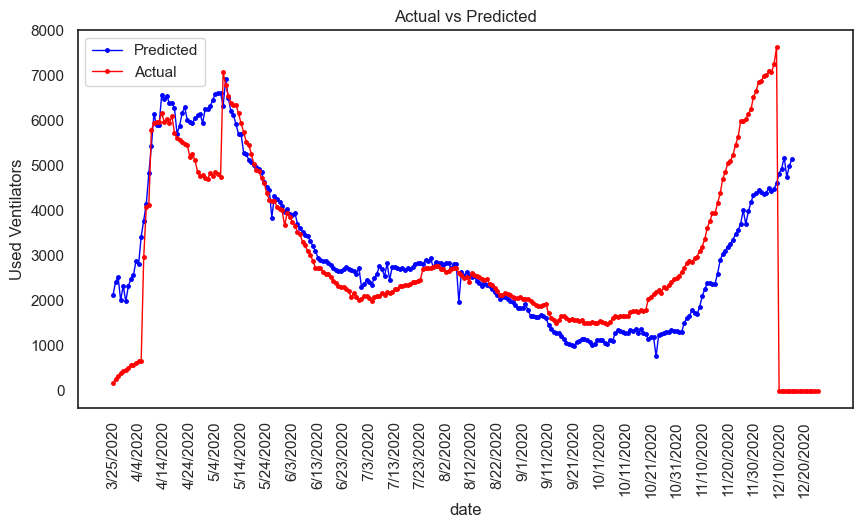

In [54]:
sns.set(style='white')

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(df_Covid_data_Offset_prediction.index, predicted_y, label="Predicted", linewidth=1, marker='.', markersize=5, color='blue')
plt.plot(df_Covid_data_Offset_prediction.index, df_Covid_data_Offset_prediction['onVentilatorCurrently'], label="Actual", linewidth=1, marker='.', markersize=5, color='red')
# plt.plot(dc.index, dc["Error"], label="Error", linewidth=1, marker='.', markersize=10, color='green')


plt.xticks(df_Covid_data_Offset_prediction.index[::10], rotation=90)
plt.title('Actual vs Predicted')
plt.xlabel('date')
plt.ylabel('Used Ventilators')

plt.legend()
#plt.savefig('covid_outbreak.png', dpi=100)
plt.show()